Importation des bibliothèques nécessaires :

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1️⃣ Charger les données 

In [5]:
df = pd.read_csv('../data/raw/tiktok_students.csv')
df.head()

,id,age,sex,study_level,hours_tiktok_per_day,sleep_hours,study_hours,social_interaction,wellbeing_score,academic_score
0,1,22,Homme,Master,2.9,5.6,1.8,7,8.8,14.6
1,2,19,Homme,Licence,1.6,5.1,5.1,2,5.8,13.3
2,3,28,Homme,Master,3.1,6.4,2.4,6,4.1,14.1
3,4,30,Homme,Master,2.6,6.2,2.3,10,10.0,12.4
4,5,26,Femme,Licence,1.8,5.5,4.6,7,7.7,10.7


2️⃣ Vérifier la structure et les types de données

     Objectif : comprendre les colonnes, types, valeurs nulles ou aberrantes.

In [6]:
# Informations sur les colonnes et types
df.info()

# Statistiques descriptives
df.describe()

# Vérifier les valeurs manquantes
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   sex                   1000 non-null   object 
 3   study_level           1000 non-null   object 
 4   hours_tiktok_per_day  1000 non-null   float64
 5   sleep_hours           1000 non-null   float64
 6   study_hours           1000 non-null   float64
 7   social_interaction    1000 non-null   int64  
 8   wellbeing_score       1000 non-null   float64
 9   academic_score        1000 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 78.3+ KB


id                      0
age                     0
sex                     0
study_level             0
hours_tiktok_per_day    0
sleep_hours             0
study_hours             0
social_interaction      0
wellbeing_score         0
academic_score          0
dtype: int64

3️⃣ Exploration rapide des colonnes

Distribution de l’âge :

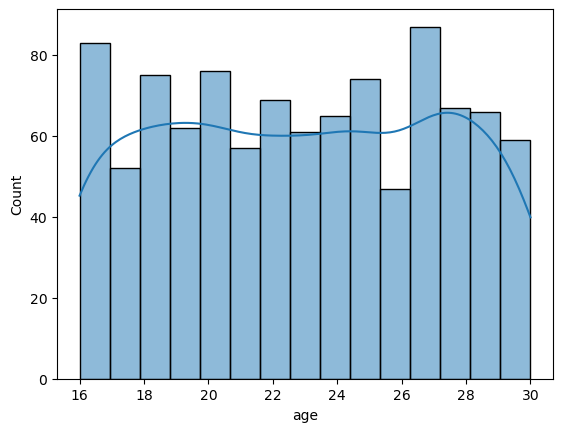

In [7]:
sns.histplot(df['age'], bins=15, kde=True)
plt.show()


Répartition par sexe :

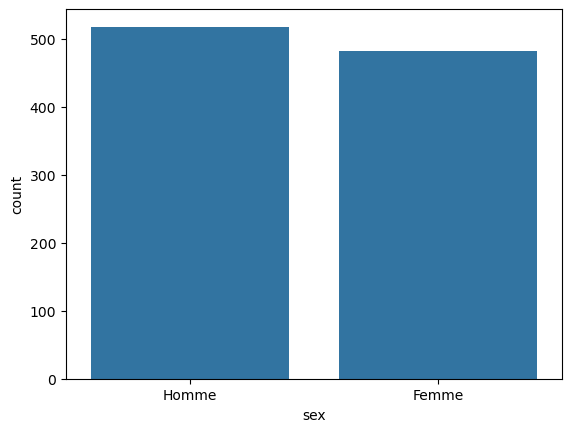

In [8]:
sns.countplot(data=df, x='sex')
plt.show()


Temps passé sur TikTok :

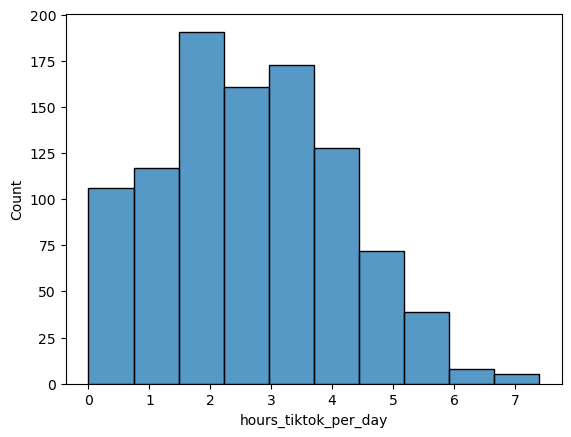

In [9]:
sns.histplot(df['hours_tiktok_per_day'], bins=10)
plt.show()


4️⃣ Corrélations entre variables

    *Identifier les relations possibles
    *Cherche des patterns comme :
        -Plus de temps sur TikTok → moins de sommeil ou moins d’heures d’étude ?
        -Bien-être ou notes académiques influencés par le temps d’écran ?

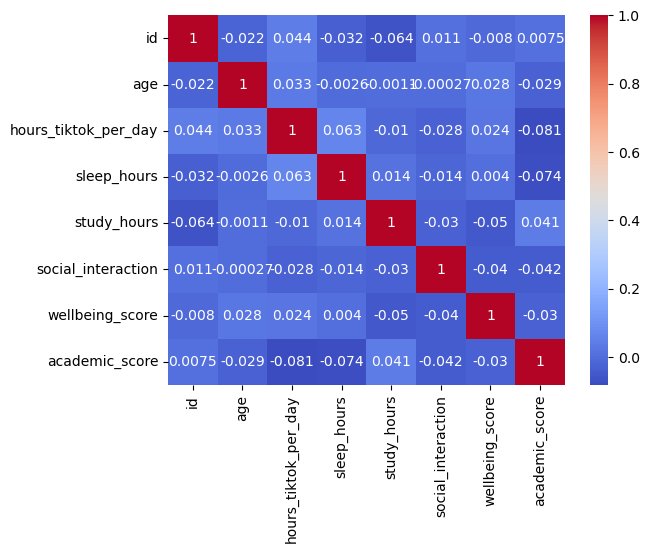

In [11]:
# Sélection des colonnes numériques uniquement
numeric_df = df.select_dtypes(include=np.number)

# Calcul des corrélations
corr = numeric_df.corr()

# Affichage avec heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


5️⃣ Nettoyage initial

Limiter certaines valeurs si nécessaire :

In [12]:
# Exemple pour éviter les valeurs négatives
df['study_hours'] = df['study_hours'].clip(lower=0)
df['hours_tiktok_per_day'] = df['hours_tiktok_per_day'].clip(lower=0)


Vérifier doublons :

In [ ]:
df.duplicated().sum()

0

6️⃣ Visualisations plus poussées

Comparer le temps TikTok selon le sexe :

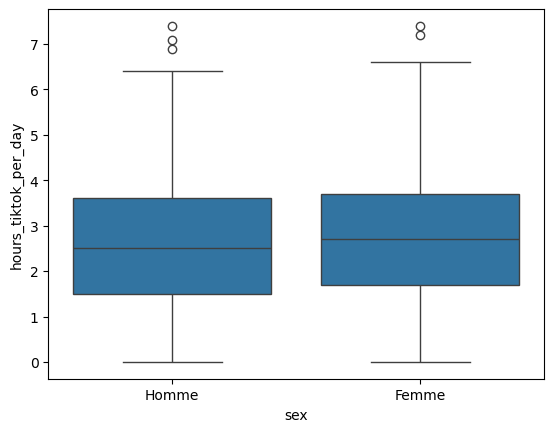

In [14]:
sns.boxplot(data=df, x='sex', y='hours_tiktok_per_day')
plt.show()


Relation entre TikTok et sommeil :

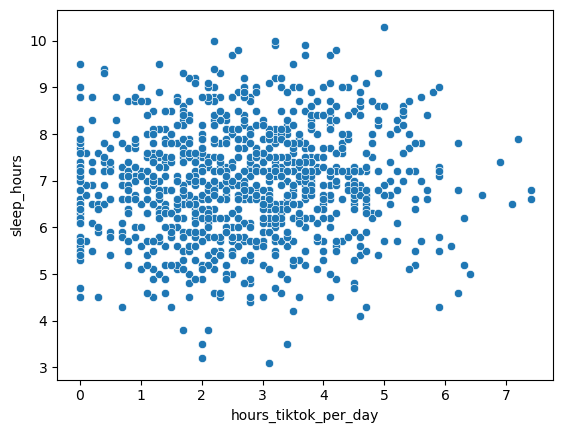

In [15]:
sns.scatterplot(data=df, x='hours_tiktok_per_day', y='sleep_hours')
plt.show()
